<a href="https://colab.research.google.com/github/kalyaniasthana/dl-hateful-memes-project/blob/master/late_fusion_error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

predictions = pd.read_csv('/content/predictions-latefusion.csv')
predictions = predictions[['ids', 'predictions', 'ground_truth']]
predictions.columns = ['id', 'y_pred', 'y_truth']
predictions.head()

,id,y_pred,y_truth
0,8291,0,1
1,46971,0,1
2,3745,0,1
3,83745,0,1
4,80243,1,1


In [5]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list(predictions.y_truth), list(predictions.y_pred))
cm

array([[204,  49],
       [163,  84]])

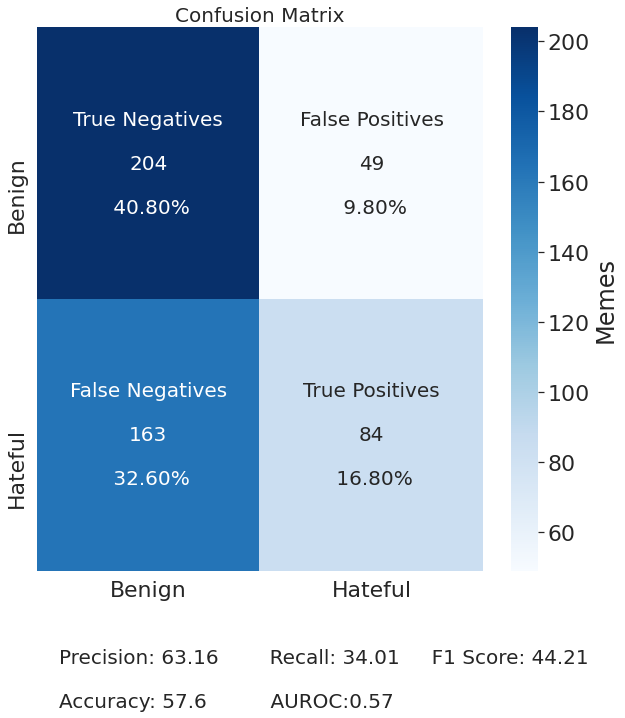

In [6]:
import seaborn as sns
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(predictions, confusion_matrix):

    tn = confusion_matrix[0, 0]
    fp = confusion_matrix[0, 1]
    fn = confusion_matrix[1, 0]
    tp = confusion_matrix[1, 1]
    total = predictions.shape[0]
    percent = (confusion_matrix/confusion_matrix.sum())*100
    
    accuracy = ((tp+tn)/total)*100
    Precision = (tp/(tp+fp))*100
    Recall = (tp/(tp+fn))*100
    F1_score =  2 * (Precision * Recall) / (Precision + Recall)
    AUROC_score = roc_auc_score(list(predictions.y_truth), list(predictions.y_pred))
    
    df_cm = pd.DataFrame(confusion_matrix, ['Benign','Hateful'], ['Benign','Hateful'])
    text = np.asarray([['True Negatives', 'False Positives'], ['False Negatives', 'True Positives']])
    label = (np.asarray(["{0}\n\n{1}\n\n{2: .2f}%".format(text,confusion_matrix,percent) for text, confusion_matrix, percent in zip(text.flatten(), confusion_matrix.flatten(), percent.flatten())])).reshape(2,2)
    
    plt.figure(figsize=(10,10))
    sns.set(font_scale=2)
    sns.heatmap(df_cm, annot=label, annot_kws={"size": 20}, cbar_kws={'label':"Memes"}, fmt ='', cmap ='Blues')
    
    plt.title('Confusion Matrix', fontsize=20)
    plt.text(0.1, 2.5, 'Precision: '+str(round(Precision,2)) + '        Recall: '+str(round(Recall,2))+'     F1 Score: '+str(round(F1_score,2))+
            '\n\nAccuracy: '+ str(round(accuracy,2))+'          AUROC:'+ str(round(AUROC_score,2)), fontsize=20)
    plt.show()

plot_confusion_matrix(predictions, cm)